<a href="https://colab.research.google.com/github/lmdpnew/Bot-IoT/blob/main/Pipeline_subcategory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deep-forest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 36.3 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC

# Load multi-class classification dataset
from deepforest import CascadeForestClassifier


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from google.colab import drive
drive.mount('/content/drive/')

# Insert the directory
import sys
sys.path.insert(0,'/content/drive/My Drive/')

Mounted at /content/drive/


In [3]:
# Load the dataset and split into train/test splits

# df = pd.read_csv('479.csv',sep=",") 
# del df['Unnamed: 0']

df=pd.read_csv('/content/drive/My Drive/data/UNSW_2018_IoT_Botnet_Final_10_Best.csv',sep=";")  
del df['Unnamed: 0']
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [4]:
# 'attack','category','subcategory'
ten_best_features = df[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max','subcategory']]

In [5]:
pd.value_counts(df.subcategory)

UDP                  1981230
TCP                  1593180
Service_Scan           73168
OS_Fingerprint         17914
HTTP                    2474
Normal                   477
Keylogging                73
Data_Exfiltration          6
Name: subcategory, dtype: int64

In [6]:
classes = list(ten_best_features['subcategory'].unique()) 
classes

['HTTP',
 'TCP',
 'UDP',
 'Normal',
 'OS_Fingerprint',
 'Service_Scan',
 'Data_Exfiltration',
 'Keylogging']

In [7]:
labels = ['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']

In [8]:
# Load the dataset and split into train/test splits

ten_best_features = ten_best_features.values

y = ten_best_features[:,10]
X = ten_best_features[:,0:10]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

# ROC AUC

In [9]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.model_selection import FeatureImportances

--------------------------------------------
ROCAUC
--------------------------------------------


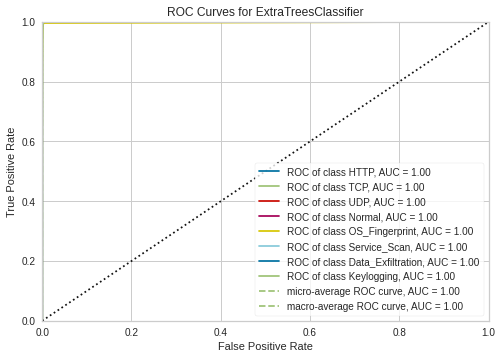

--------------------------------------------
confusion_matrix classification_report
--------------------------------------------
accuracy_score: 0.9990831915112075 ExtraTreesClassifier()
[[     1      0      0      1      0      0      0      0]
 [     0    748      0      1      0      0      1      0]
 [     0      0     19      1      1      0      1      0]
 [     0      1      0    137      0      2      1      0]
 [     0      0      0      0   4826    558      3      0]
 [     0      0      0      2    424  21350      3      0]
 [     0      0      0      0      1      1 477772      3]
 [     0      0      0      0      0      0      4 594695]]


                   precision    recall  f1-score   support

Data_Exfiltration       1.00      0.50      0.67         2
             HTTP       1.00      1.00      1.00       750
       Keylogging       1.00      0.86      0.93        22
           Normal       0.96      0.97      0.97       141
   OS_Fingerprint       0.92      0.90    

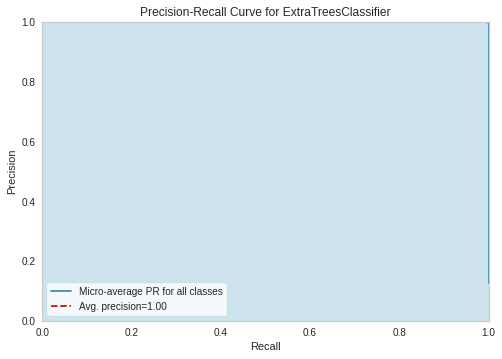

--------------------------------------------
PrecisionRecallCurve
--------------------------------------------


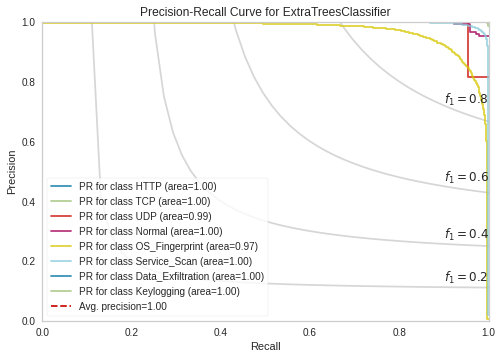

--------------------------------------------
ROCAUC
--------------------------------------------


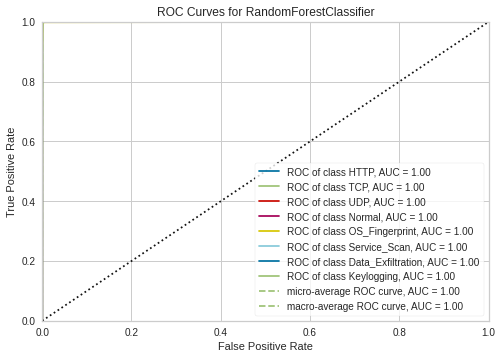

--------------------------------------------
confusion_matrix classification_report
--------------------------------------------
accuracy_score: 0.9992358414875376 RandomForestClassifier()
[[     1      0      0      0      1      0      0      0]
 [     0    749      0      1      0      0      0      0]
 [     0      1     19      1      0      1      0      0]
 [     0      0      0    137      0      3      1      0]
 [     0      0      0      0   4920    467      0      0]
 [     0      1      0      4    353  21421      0      0]
 [     0      0      0      1      0      0 477774      2]
 [     0      0      0      0      0      0      4 594695]]


                   precision    recall  f1-score   support

Data_Exfiltration       1.00      0.50      0.67         2
             HTTP       1.00      1.00      1.00       750
       Keylogging       1.00      0.86      0.93        22
           Normal       0.95      0.97      0.96       141
   OS_Fingerprint       0.93      0.91  

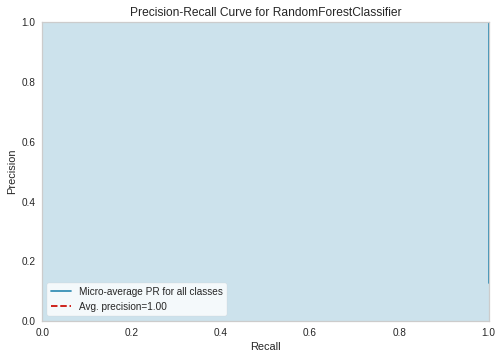

--------------------------------------------
PrecisionRecallCurve
--------------------------------------------


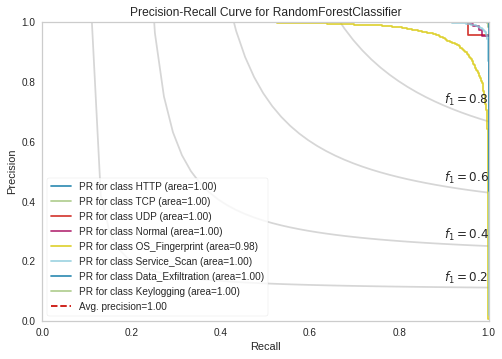

--------------------------------------------
ROCAUC
--------------------------------------------


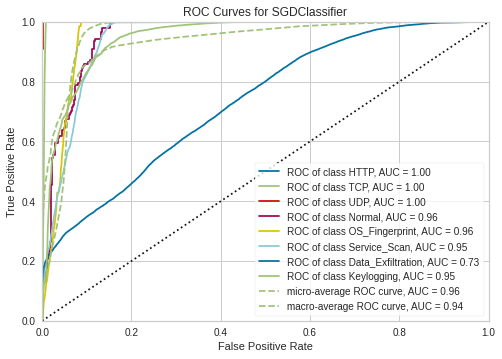

--------------------------------------------
confusion_matrix classification_report
--------------------------------------------
accuracy_score: 0.6115457899954296 SGDClassifier()
[[     0      0      0      0      0      0      0      2]
 [     0      0      0      0     21      4    659     66]
 [     0      0      0      0      0     15      0      7]
 [     0      0      0      0      0      2     10    129]
 [     0      0      0     75     71     24   5148     69]
 [     0      0      0     98    973     83  17935   2690]
 [     0      0      0      0     85    109 467039  10544]
 [     0      0      0      0      0   1191 387660 205848]]


                   precision    recall  f1-score   support

Data_Exfiltration       0.00      0.00      0.00         2
             HTTP       0.00      0.00      0.00       750
       Keylogging       0.00      0.00      0.00        22
           Normal       0.00      0.00      0.00       141
   OS_Fingerprint       0.06      0.01      0.02 

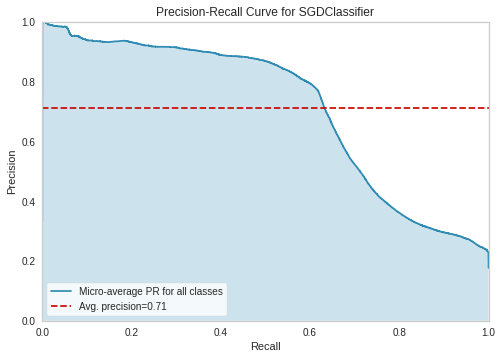

--------------------------------------------
PrecisionRecallCurve
--------------------------------------------


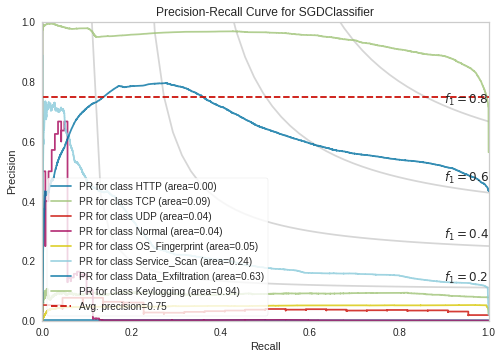

--------------------------------------------
ROCAUC
--------------------------------------------
[2023-01-12 15:50:22.465] Start to fit the model:
[2023-01-12 15:50:22.466] Fitting cascade layer = 0 
[2023-01-12 16:11:01.282] layer = 0  | Val Acc = 99.873 % | Elapsed = 1238.816 s
[2023-01-12 16:11:04.633] Fitting cascade layer = 1 
[2023-01-12 16:22:42.611] layer = 1  | Val Acc = 99.884 % | Elapsed = 697.978 s
[2023-01-12 16:22:45.836] Fitting cascade layer = 2 
[2023-01-12 16:32:56.826] layer = 2  | Val Acc = 99.893 % | Elapsed = 610.990 s
[2023-01-12 16:33:00.352] Fitting cascade layer = 3 
[2023-01-12 16:43:58.090] layer = 3  | Val Acc = 99.898 % | Elapsed = 657.738 s
[2023-01-12 16:44:01.573] Fitting cascade layer = 4 
[2023-01-12 16:55:15.458] layer = 4  | Val Acc = 99.904 % | Elapsed = 673.885 s
[2023-01-12 16:55:18.919] Fitting cascade layer = 5 
[2023-01-12 17:06:39.163] layer = 5  | Val Acc = 99.908 % | Elapsed = 680.244 s
[2023-01-12 17:06:42.667] Fitting cascade layer = 6 


In [ ]:
models = [
    ExtraTreesClassifier(n_estimators=100),
    RandomForestClassifier(n_estimators=100),
    SGDClassifier(),
    CascadeForestClassifier() 
]

for model in models:
     
    # Instaniate the classification model and visualizer
    print("--------------------------------------------")
    print("ROCAUC")
    print("--------------------------------------------")
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and render the figure
    #visualizer
    
    print("--------------------------------------------")
    print("confusion_matrix classification_report")
    print("--------------------------------------------")
    
    predicted = visualizer.predict(X_test)
    print("accuracy_score:",format(accuracy_score(y_test, predicted)), model)
    print(confusion_matrix(y_test,predicted))
    print('\n')
    print(classification_report(y_test,predicted))
    
    print("--------------------------------------------")
    print("recall_curve_viz")
    print("--------------------------------------------")
    
    # recall_curve_viz : Create the visualizer, fit, score, and show it
    recall_curve_viz = precision_recall_curve(model, X_train, y_train, X_test, y_test)
    recall_curve_viz.show()

    print("--------------------------------------------")
    print("PrecisionRecallCurve")
    print("--------------------------------------------")
    
    # PrecisionRecallCurve : Create the visualizer, fit, score, and show it 
    viz = PrecisionRecallCurve(model,classes=classes,iso_f1_curves=True,per_class=True,micro=False)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()  